In [1]:
from matplotlib import pyplot as plt
import plotastic as plst

# Example Analysis: FMRI

**Raw Data:**
https://github.com/mwaskom/seaborn-data
  
**Original Source:**
https://github.com/mwaskom/Waskom_CerebCortex_2017

### Import example Data

In [2]:
# Import Example Data
DF, _dims = plst.load_dataset("fmri", verbose=False)
DF.head()

,Unnamed: 0,subject,timepoint,event,region,signal
0,17,s7,9,stim,parietal,0.058897
1,36,s8,9,stim,parietal,0.170227
2,67,s0,0,stim,frontal,-0.021452
3,84,s1,0,stim,parietal,-0.064454
4,127,s13,9,stim,parietal,0.013245


#### Assign each column to a dimension (y, x, hue, col, row)

In [3]:
dims = dict(
    y="signal",
    x="timepoint",
    hue="event",
    col="region",
)

### Initialize DataAnalysis Object
- DataAnalysis will give you feedback on data
- This iobject contains every tool you need, from plotting to statistics!

In [4]:
DA = plst.DataAnalysis(
    data=DF,  # Dataframe
    dims=dims,  # Dictionary with y, x, hue, col, row
    subject="subject",  # Data is paired by subject (optional)
    verbose=True,  # Print out Info about the Data
)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
✅ GROUPS EQUAL: All groups (40 total) have the same samplesize n = 14.0.
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['region', 'event'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.
✅ Subjects complete: No subjects with missing data


#### Quick Preview Plot

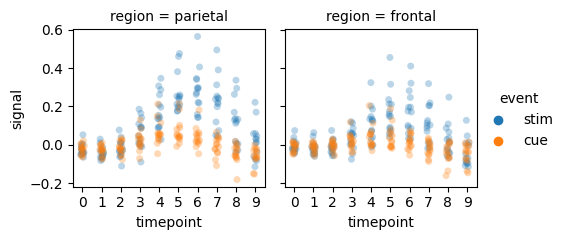

<Figure size 640x480 with 0 Axes>

In [5]:
DA.catplot(alpha=0.3)  # Works with *kwargs of seaborn.catplot()
plt.savefig("fmri1.png", dpi=300, bbox_inches="tight")

### Perform Statistics
- No need to re-write arguments. DataAnalysis object will remember them!

#### Check Normality

In [6]:
DA.check_normality().head(20)

W      pval  normal   n
region  event timepoint                                
frontal cue   0          0.914917  0.185710    True  14
              6          0.974828  0.933696    True  14
              3          0.932624  0.331983    True  14
              5          0.869613  0.041439   False  14
              7          0.965730  0.814991    True  14
              1          0.953819  0.621403    True  14
              4          0.853934  0.025128   False  14
              2          0.959380  0.712867    True  14
              8          0.912661  0.172244    True  14
              9          0.907248  0.143726    True  14
        stim  0          0.898415  0.106968    True  14
              6          0.939964  0.417863    True  14
              4          0.945087  0.487335    True  14
              1          0.909201  0.153429    True  14
              2          0.943336  0.462730    True  14
              3          0.962568  0.765064    True  14
              9          0.869722  0.041585   False  14
              5          0.897018  0.102095    True  14
              7          0.940434  0.423909    True  14
              8          0.876136  0.051214    True  14

#### Check Sphericity

In [7]:
DA.check_sphericity()

spher             W        chi2  dof  pval  group count  \
region   event                                                              
frontal  cue   0   True  3.260856e+20 -462.715239   44   1.0           10   
         stim  0   True  2.456616e+17 -392.270460   44   1.0           10   
parietal cue   0   True  1.202935e+20 -452.946123   44   1.0           10   
         stim  0   True  2.443175e+13 -301.989490   44   1.0           10   

                                               n per group  
region   event                                              
frontal  cue   0  [14, 14, 14, 14, 14, 14, 14, 14, 14, 14]  
         stim  0  [14, 14, 14, 14, 14, 14, 14, 14, 14, 14]  
parietal cue   0  [14, 14, 14, 14, 14, 14, 14, 14, 14, 14]  
         stim  0  [14, 14, 14, 14, 14, 14, 14, 14, 14, 14]

#### Repeated Measures ANOVA

In [8]:
DA.omnibus_rm_anova()

Source        SS  ddof1  ddof2        MS          F  \
region                                                                       
parietal 0          timepoint  1.583420      9    117  0.175936  26.205536   
         1              event  0.770449      1     13  0.770449  85.316794   
         2  timepoint * event  0.623532      9    117  0.069281  29.541730   
frontal  0          timepoint  0.686264      9    117  0.076252  15.988779   
         1              event  0.240461      1     13  0.240461  23.441963   
         2  timepoint * event  0.242941      9    117  0.026993  13.031063   

                   p-unc stars     p-GG-corr       ng2       eps  
region                                                            
parietal 0  3.402866e-24  ****  5.834631e-07  0.542320  0.222299  
         1  4.483881e-07  ****  4.483881e-07  0.365706  1.000000  
         2  3.262477e-26  ****  3.521208e-06  0.318157  0.171882  
frontal  0  8.285677e-17  ****  8.940660e-05  0.394411  0.190812  
         1  3.218963e-04   ***  3.218963e-04  0.185803  1.000000  
         2  3.235739e-14  ****  1.566020e-04  0.187360  0.213142

#### Post-hoc t-tests

In [9]:
DA.test_pairwise()

timepoint  A  B   mean(A)    std(A)  \
region   event Contrast                                                
parietal -     timepoint                 -  0  1 -0.024080  0.019279   
               timepoint                 -  0  2 -0.024080  0.019279   
               timepoint                 -  0  3 -0.024080  0.019279   
               timepoint                 -  0  4 -0.024080  0.019279   
               timepoint                 -  0  5 -0.024080  0.019279   
...                                    ... .. ..       ...       ...   
frontal  stim  event * timepoint       NaN  6  8  0.171782  0.113811   
               event * timepoint       NaN  6  9  0.171782  0.113811   
               event * timepoint       NaN  7  8  0.109996  0.098997   
               event * timepoint       NaN  7  9  0.109996  0.098997   
               event * timepoint       NaN  8  9  0.024913  0.083956   

                                   mean(B)    std(B) Paired  Parametric  \
region   event Contrast                                                   
parietal -     timepoint         -0.034378  0.020787   True        True   
               timepoint         -0.017773  0.032772   True        True   
               timepoint          0.041580  0.056211   True        True   
               timepoint          0.119216  0.072481   True        True   
               timepoint          0.168279  0.076726   True        True   
...                                    ...       ...    ...         ...   
frontal  stim  event * timepoint  0.024913  0.083956   True        True   
               event * timepoint -0.042044  0.070980   True        True   
               event * timepoint  0.024913  0.083956   True        True   
               event * timepoint -0.042044  0.070980   True        True   
               event * timepoint -0.042044  0.070980   True        True   

                                         T   dof alternative     p-unc  \
region   event Contrast                                                  
parietal -     timepoint          4.289549  13.0   two-sided  0.000880   
               timepoint         -0.755546  13.0   two-sided  0.463392   
               timepoint         -4.031294  13.0   two-sided  0.001426   
               timepoint         -6.565685  13.0   two-sided  0.000018   
               timepoint         -8.059735  13.0   two-sided  0.000002   
...                                    ...   ...         ...       ...   
frontal  stim  event * timepoint  5.202021  13.0   two-sided  0.000170   
               event * timepoint  5.978460  13.0   two-sided  0.000046   
               event * timepoint  5.899680  13.0   two-sided  0.000052   
               event * timepoint  6.295658  13.0   two-sided  0.000028   
               event * timepoint  6.073903  13.0   two-sided  0.000039   

                                      BF10    hedges **p-unc    Sign.  \
region   event Contrast                                                 
parietal -     timepoint            43.681  0.498734     ***  signif.   
               timepoint             0.346 -0.227782      ns    False   
               timepoint            28.944 -1.517100      **  signif.   
               timepoint          1298.443 -2.623299    ****  signif.   
               timepoint          9016.247 -3.338521    ****  signif.   
...                                    ...       ...     ...      ...   
frontal  stim  event * timepoint   180.476  1.425848     ***  signif.   
               event * timepoint   568.484  2.188817    ****  signif.   
               event * timepoint   507.441  0.899980    ****  signif.   
               event * timepoint   892.198  1.713727    ****  signif.   
               event * timepoint   651.786  0.836222    ****  signif.   

                                                   pairs cross  
region   event Contrast                                         
parietal -     timepoint                          (0, 1)     x  
            

#### Save Results
Output is one excel file containing results of all performed tests (normality, anova,
t-tests, etc.) in different sheets

In [10]:
DA.save_statistics(
    fname="fmri",
    overwrite=True,  # Overwrite existing files
    # overwrite = "day"  # Adds the current date to filename (daily overwrite)
    # overwrite = False  # Adds a number to filename, file never overwritten
)

## Plotting


#### Use matplotlib styles (optional)

In [11]:
plt.rcdefaults()  # Reset rc to default
plt.style.use("ggplot")  # Set styles as you're used to'

#### Chain multiple commands for plotting:

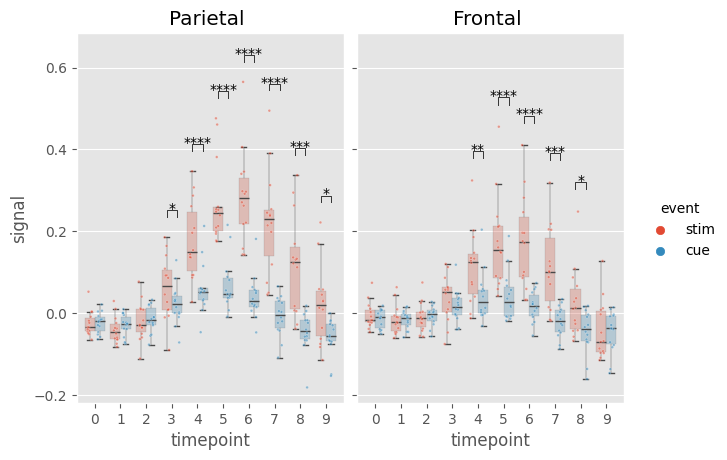

In [12]:
(
    DA.plot_box_strip().annotate_pairwise(  # Use a pre-built plotting function to initialize and draw the plot  # Place results calculated previously (DA.test_pairwise()) on the plot
        include="__HUE"  # Only annotate significant pairs across each hue, not within hue
    )
)

# Saving the plot requires
plt.savefig(
    fname="fmri2.png",
    dpi=300,
    bbox_inches="tight",
)